
# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) helps us understand the data by uncovering patterns, detecting anomalies, and summarizing relationships between variables.

In this notebook, we analyze the **NCR Ride Bookings Dataset** containing 150,000 records of customer ride transactions. The dataset includes booking details, ride distances, vehicle types, ratings, payment methods, cancellations, and timestamps.

### Objectives of this EDA
- Understand data structure, missing values, and distributions.
- Perform univariate and bivariate analysis of numerical and categorical features.
- Explore time-based patterns (daily, weekly, monthly, rush-hour trends).
- Compare relationships such as payment method vs ride distance, turnaround times vs ratings.
- Summarize key insights for business understanding and further modeling.
    

## 1. Data Loading & Initial Exploration

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data/ncr_ride_bookings.csv")

# Basic info
print("Shape:", df.shape)
display(df.head())
df.info()
df.describe(include="all").T
    

Shape: (150000, 21)


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,150000,365,2024-11-16,462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,150000,62910,17:44:57,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Booking ID,150000,148767,"""CNR3648267""",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Booking Status,150000,5,Completed,93000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,150000,148788,"""CID6715450""",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Type,150000,7,Auto,37419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pickup Location,150000,176,Khandsa,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drop Location,150000,176,Ashram,936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg VTAT,139500.0,NaN,NaN,NaN,8.456352,3.773564,2.0,5.3,8.3,11.3,20.0
Avg CTAT,102000.0,NaN,NaN,NaN,29.149636,8.902577,10.0,21.6,28.8,36.8,45.0


### Missing Values Overview

In [2]:
df.isna().sum().sort_values(ascending=False)

Incomplete Rides Reason              141000
Incomplete Rides                     141000
Reason for cancelling by Customer    139500
Cancelled Rides by Customer          139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Driver Ratings                        57000
Customer Rating                       57000
Avg CTAT                              48000
Ride Distance                         48000
Booking Value                         48000
Payment Method                        48000
Avg VTAT                              10500
Customer ID                               0
Booking Status                            0
Booking ID                                0
Time                                      0
Date                                      0
Pickup Location                           0
Drop Location                             0
Vehicle Type                              0
dtype: int64

## 2. Data Cleaning & Feature Engineering

In [3]:

# Convert Date & Time
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'].astype(str))
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Extract additional features
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()

# Rush hour flag
def rush_hour_flag(hour):
    return "Rush Hour" if (7 <= hour <= 10) or (17 <= hour <= 20) else "Non-Rush Hour"
df['Rush_Hour'] = df['Hour'].apply(rush_hour_flag)
    

## 3. Univariate Analysis

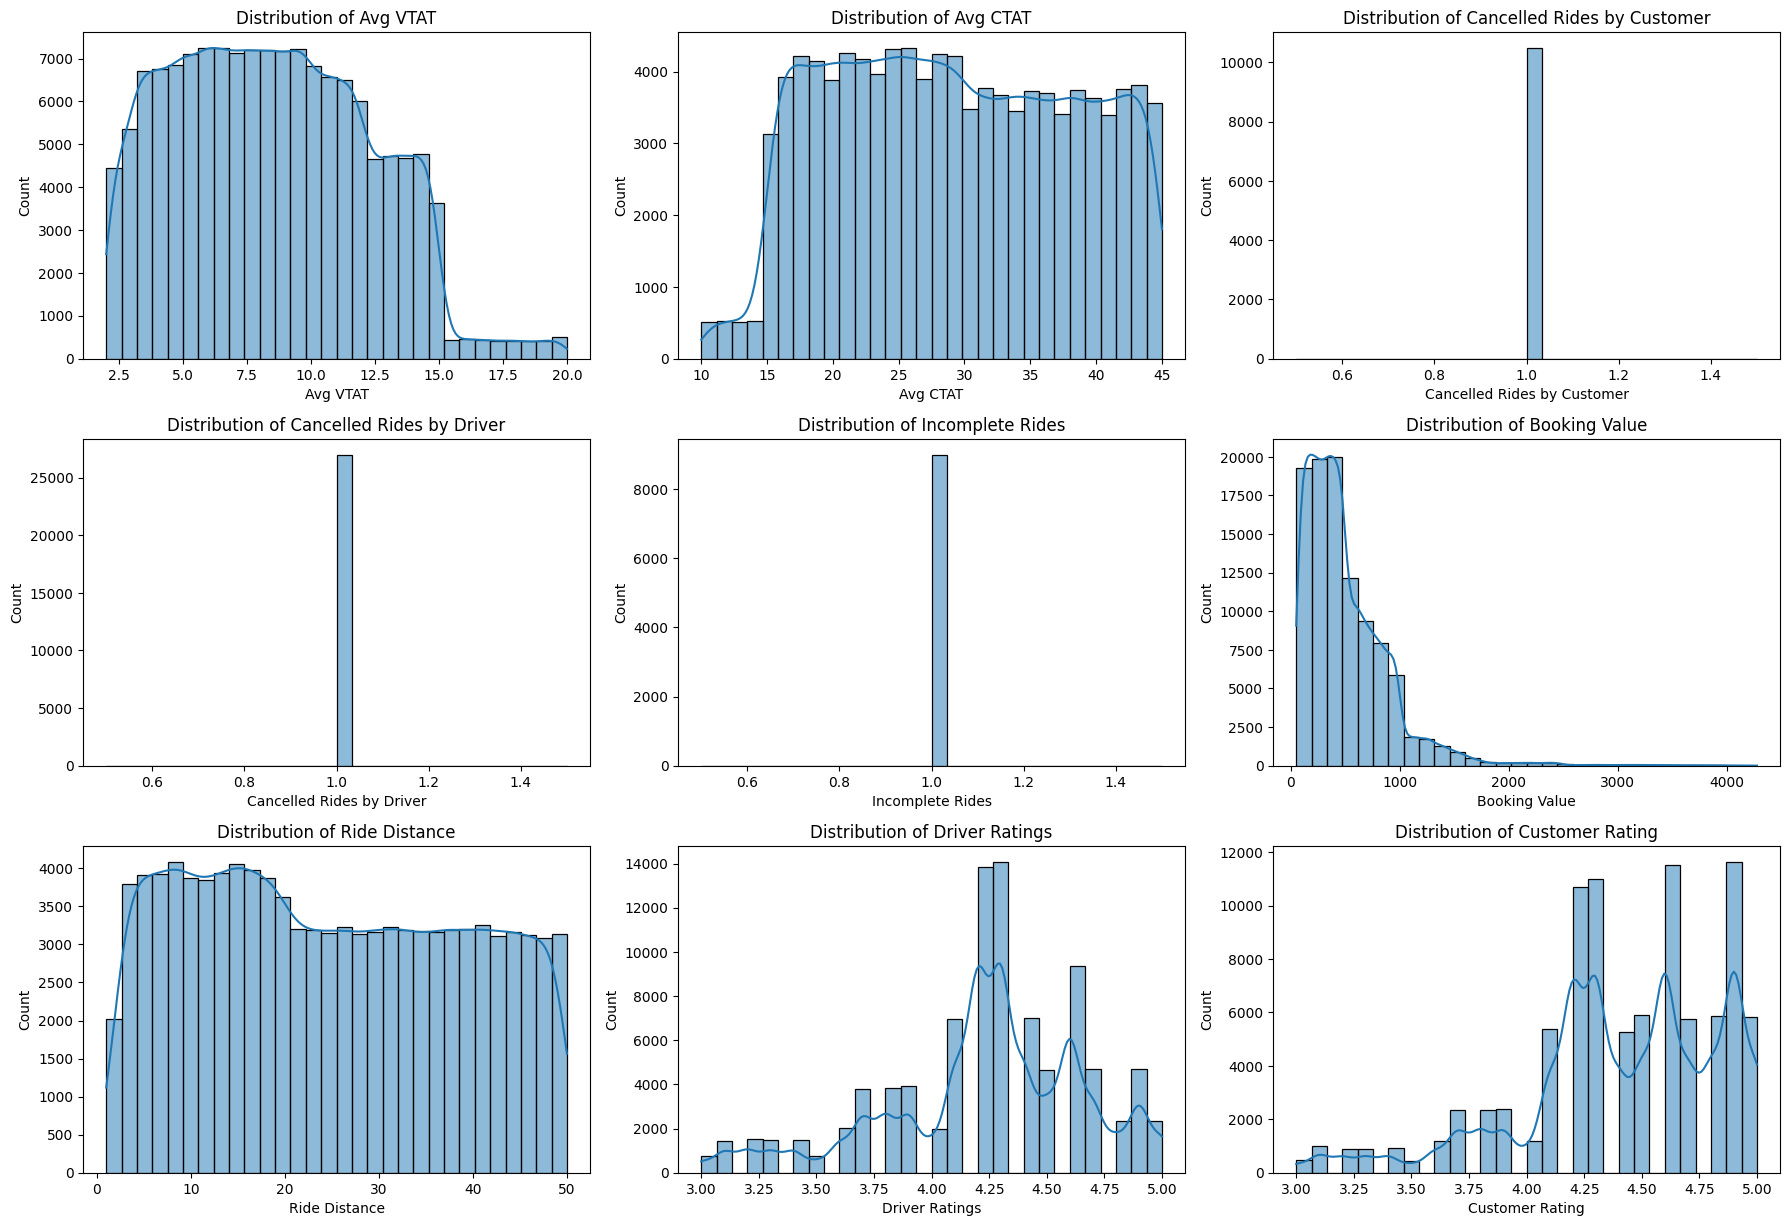

In [4]:

num_cols = [
    "Avg VTAT", "Avg CTAT", "Cancelled Rides by Customer",
    "Cancelled Rides by Driver", "Incomplete Rides",
    "Booking Value", "Ride Distance",
    "Driver Ratings", "Customer Rating"
]

rows = (len(num_cols)//3) + 1
fig, axes = plt.subplots(rows, 3, figsize=(18, rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
    

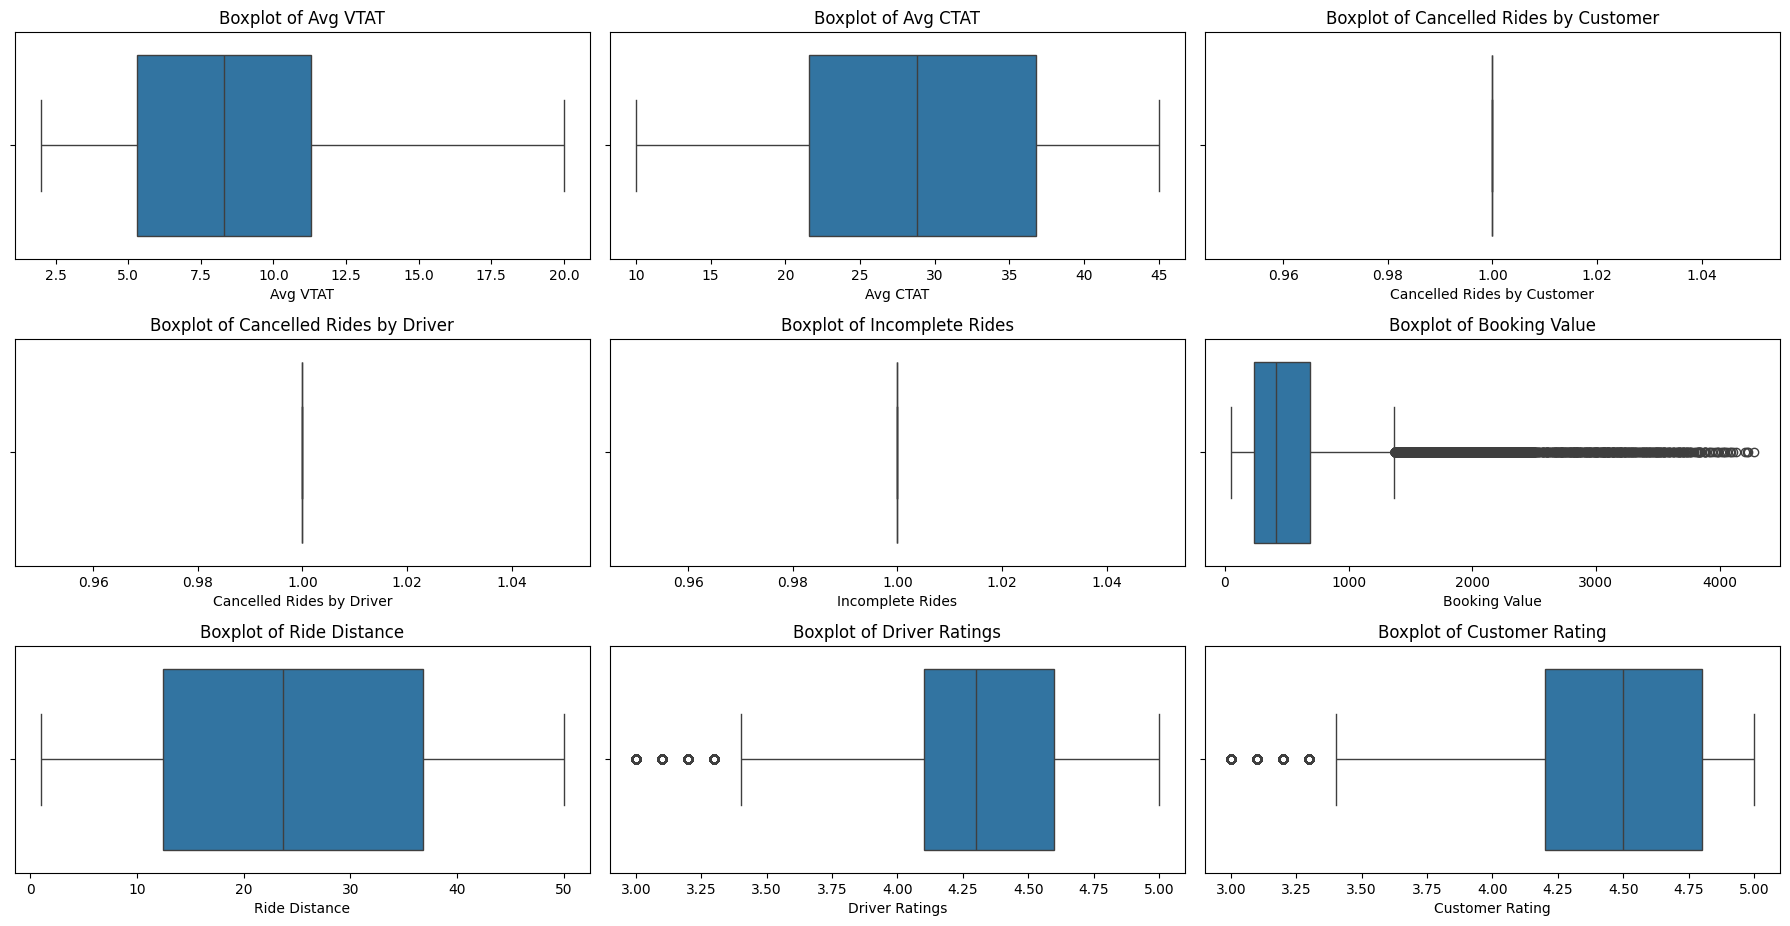

In [5]:

rows = (len(num_cols)//3) + 1
fig, axes = plt.subplots(rows, 3, figsize=(18, rows*3))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
    

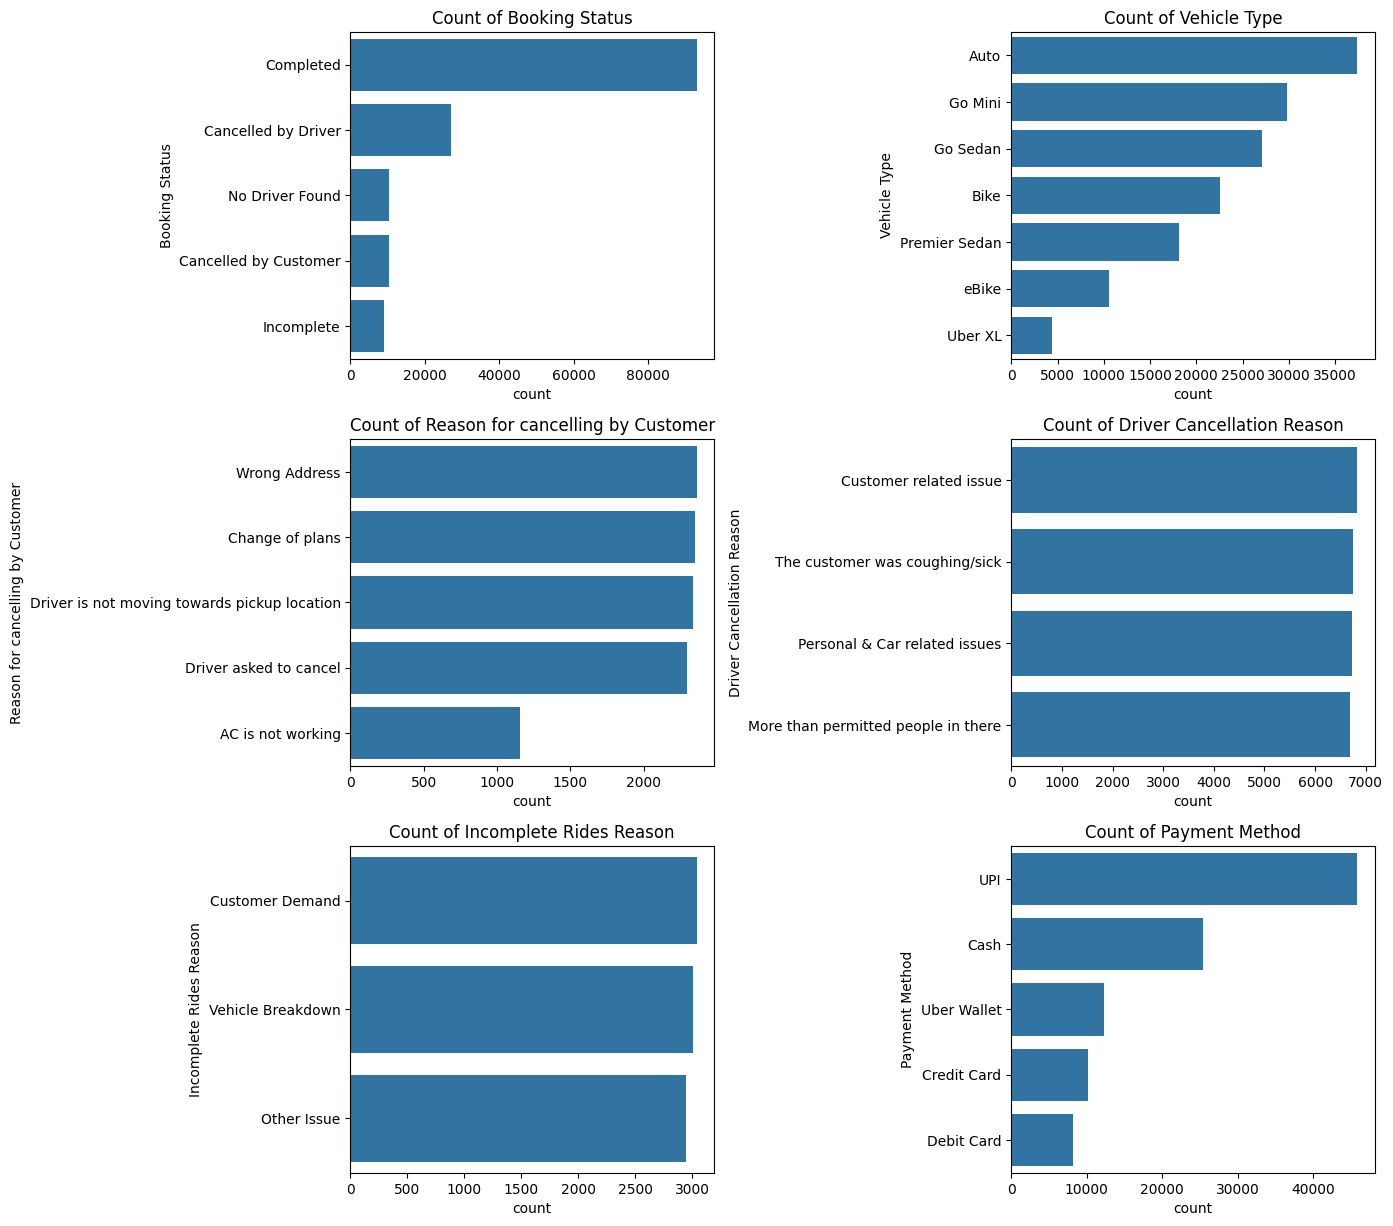

In [6]:

cat_cols = [
    "Booking Status", "Vehicle Type",
    "Reason for cancelling by Customer", "Driver Cancellation Reason",
    "Incomplete Rides Reason", "Payment Method"
]

rows = (len(cat_cols)//2) + 1
fig, axes = plt.subplots(rows, 2, figsize=(14, rows*4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Count of {col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
    

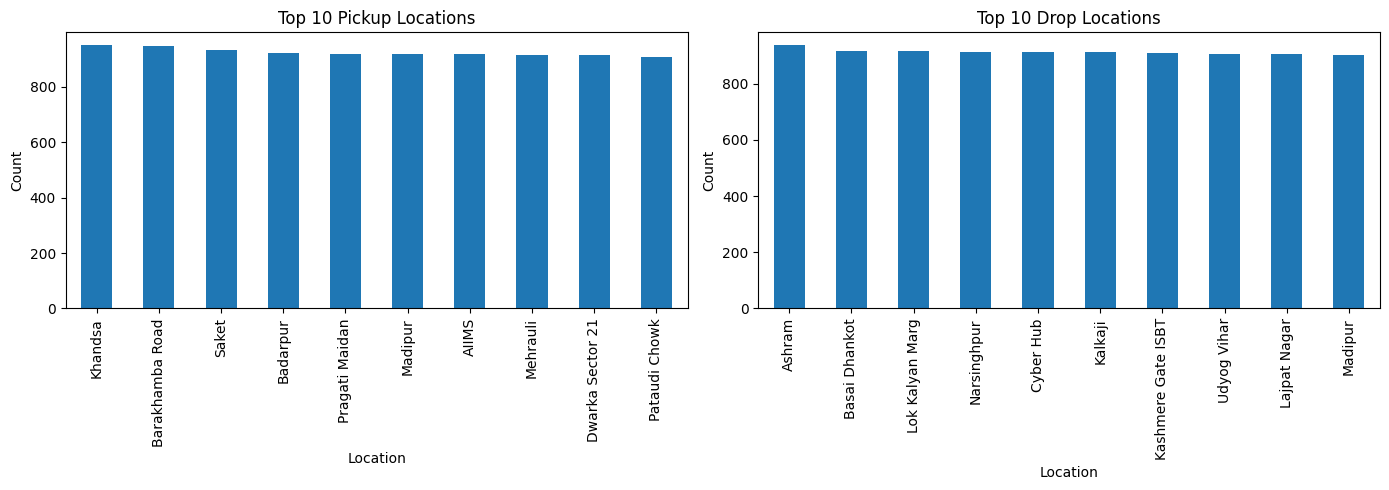

In [7]:

fig, axes = plt.subplots(1, 2, figsize=(14,5))

df["Pickup Location"].value_counts().head(10).plot(kind="bar", ax=axes[0])
axes[0].set_title("Top 10 Pickup Locations")
axes[0].set_xlabel("Location")
axes[0].set_ylabel("Count")

df["Drop Location"].value_counts().head(10).plot(kind="bar", ax=axes[1])
axes[1].set_title("Top 10 Drop Locations")
axes[1].set_xlabel("Location")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()
    

## 4. Bivariate Analysis

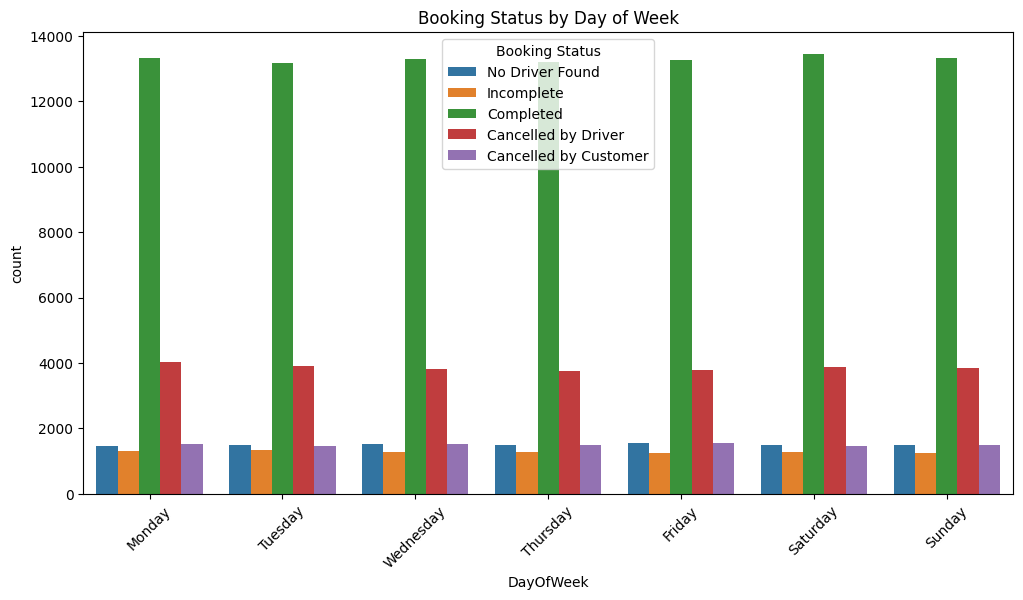

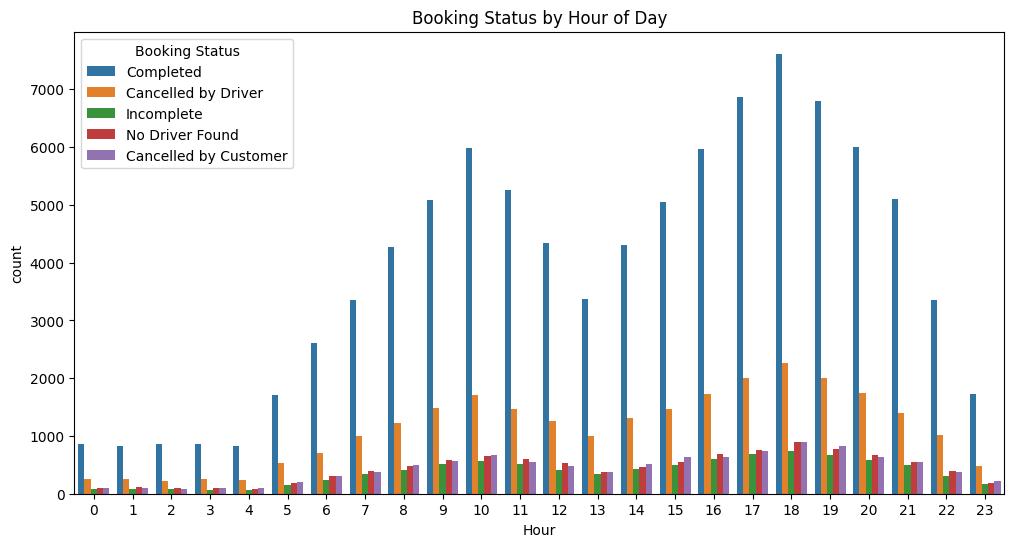

In [8]:

plt.figure(figsize=(12,6))
sns.countplot(x="DayOfWeek", hue="Booking Status", data=df,
              order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Booking Status by Day of Week")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x="Hour", hue="Booking Status", data=df, order=sorted(df["Hour"].unique()))
plt.title("Booking Status by Hour of Day")
plt.show()
    

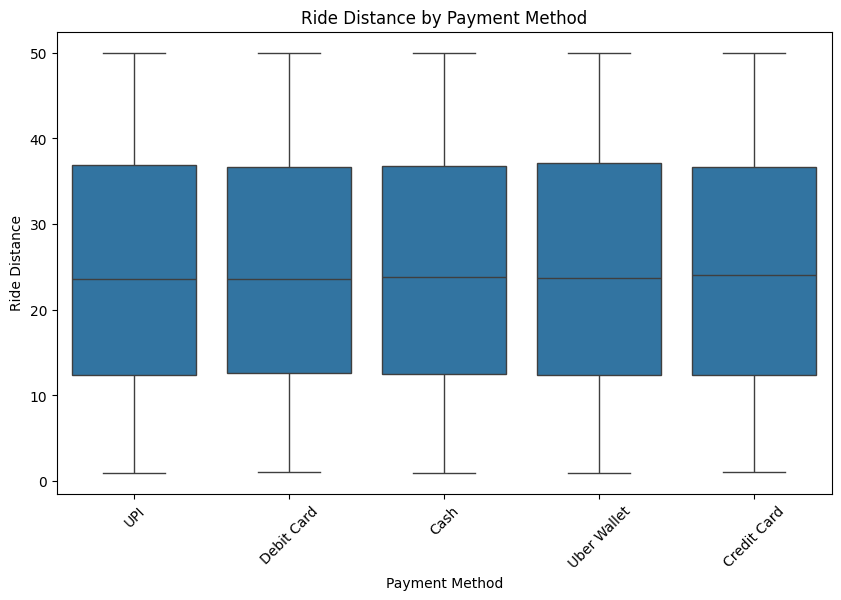

In [9]:

plt.figure(figsize=(10,6))
sns.boxplot(x="Payment Method", y="Ride Distance", data=df)
plt.title("Ride Distance by Payment Method")
plt.xticks(rotation=45)
plt.show()
    

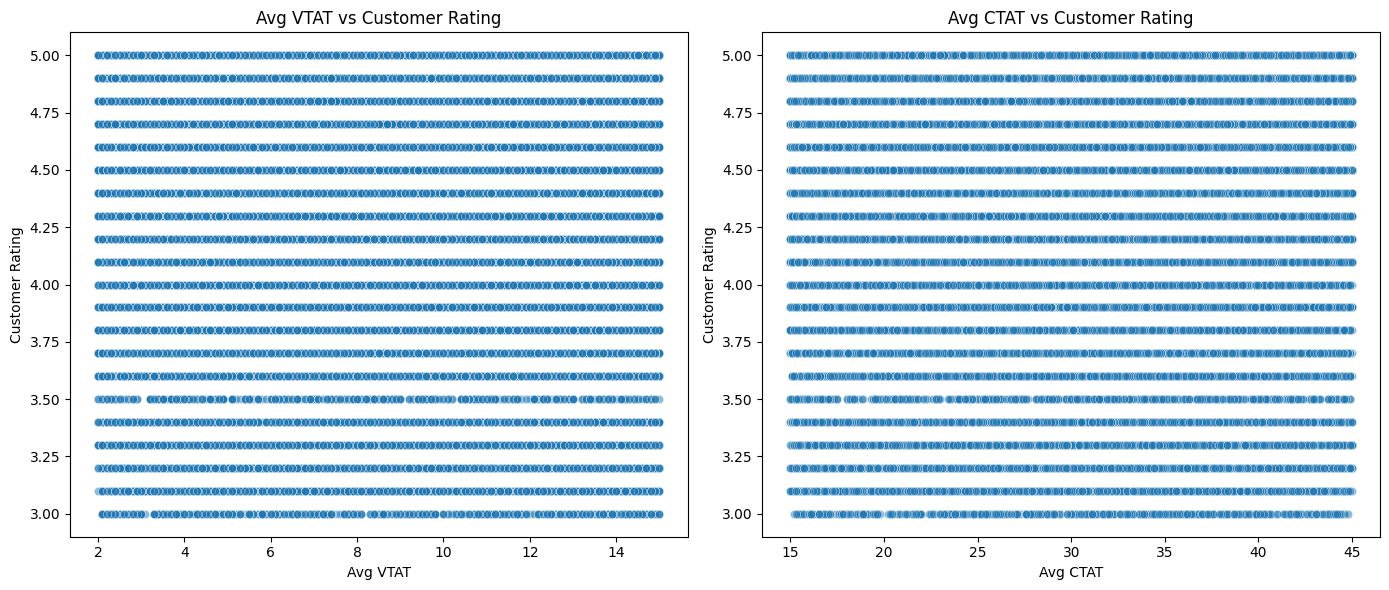

,Avg VTAT,Avg CTAT,Customer Rating
Avg VTAT,1.000000,0.062175,-0.003945
Avg CTAT,0.062175,1.000000,0.001000
Customer Rating,-0.003945,0.001000,1.000000


In [10]:

fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.scatterplot(x="Avg VTAT", y="Customer Rating", data=df, alpha=0.5, ax=axes[0])
axes[0].set_title("Avg VTAT vs Customer Rating")

sns.scatterplot(x="Avg CTAT", y="Customer Rating", data=df, alpha=0.5, ax=axes[1])
axes[1].set_title("Avg CTAT vs Customer Rating")

plt.tight_layout()
plt.show()

df[["Avg VTAT","Avg CTAT","Customer Rating"]].corr()
    

## 5. Time Series & Trends

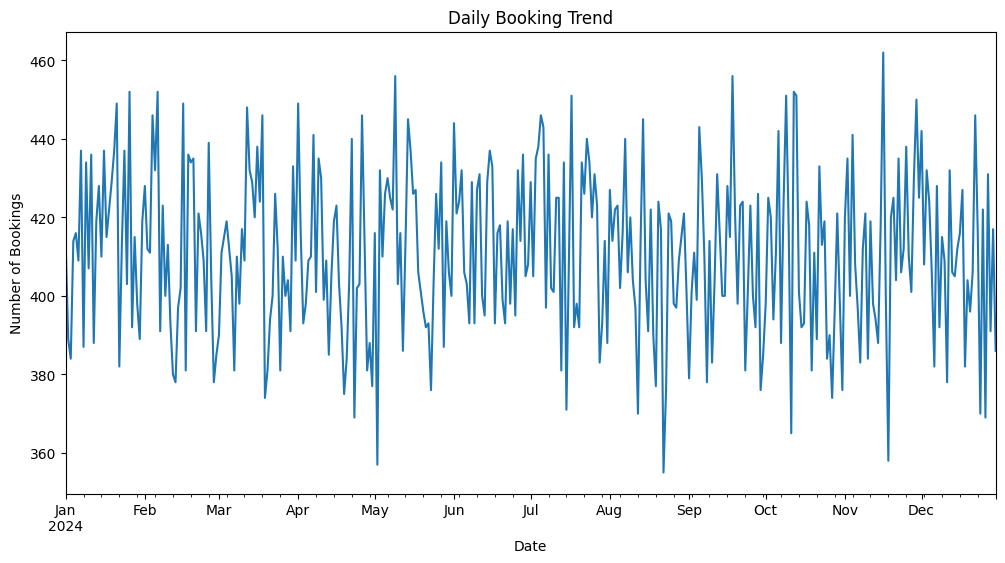

In [11]:

# Daily booking trends
daily_trend = df.groupby("Date").size()

plt.figure(figsize=(12,6))
daily_trend.plot()
plt.title("Daily Booking Trend")
plt.xlabel("Date")
plt.ylabel("Number of Bookings")
plt.show()
    

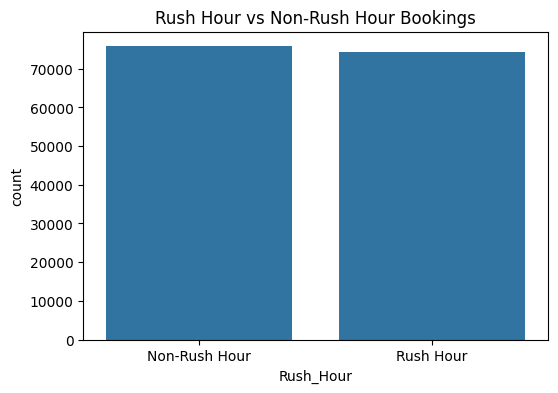

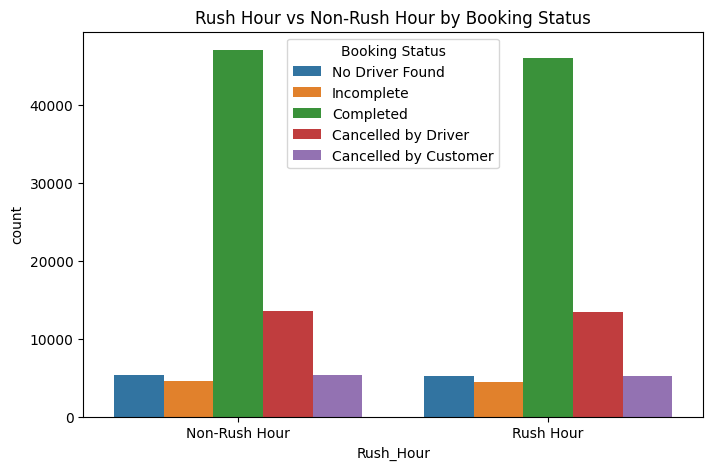

In [12]:

plt.figure(figsize=(6,4))
sns.countplot(x="Rush_Hour", data=df)
plt.title("Rush Hour vs Non-Rush Hour Bookings")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x="Rush_Hour", hue="Booking Status", data=df)
plt.title("Rush Hour vs Non-Rush Hour by Booking Status")
plt.show()
    


# 6. EDA Summary & Insights

### Data Overview
- 150,000 ride bookings, 21 columns (categorical, numerical, datetime).
- Created features: Hour, DayOfWeek, Month, Rush_Hour.

### Key Findings
- Most rides are **Completed**, with notable proportions of Cancelled and Incomplete.  
- **Rush hours** show both high demand and higher cancellations.  
- **Ride Value and Distance** are right-skewed, with some extreme outliers.  
- **Payment Methods**: UPI and Card users tend to take longer rides than cash users.  
- **Wait Times (VTAT, CTAT)** show a negative relationship with customer ratings.  
- Ratings are generally high (4–5).  
- Top vehicle types: **Go Sedan, Auto, Bike**.  
- Peak activity during **commute hours** (7–10 AM, 5–8 PM).  

### Next Steps
- Feature engineering for cancellation prediction or ride value estimation.  
- Demand forecasting using time series models.  
- Customer/driver segmentation for operational insights.  
    